In [1]:
import numpy as np
import qutip as qutip
import time as time

from matplotlib import pyplot as plt

import sys
import os
sys.path.append('../../utils')

from tomography import coherent_state_tomography as cst
from tomography import coherent_state_tomography_copy as cst2
from visualization import state_visualization as state_vis
from quantum_utils import quantum_optics_utils as qou

from mpl_toolkits.mplot3d.axes3d import Axes3D
from math_utils import statistics_utils as su

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [37]:
# Define system parameters:
dim = 100
max_x = 8
mesh_size = 0.1
alphas, xs, ps = cst2.generate_complex_mesh(max_x, mesh_size)

# Define the noise that we'll use to convolve with our state
number_of_noise_photons = 2
noise_state = qutip.thermal_dm(dim, number_of_noise_photons)

# Define the superposition states
etas = np.linspace(0, 0.75, 10)
superposition_state = (qutip.basis(dim, 0) + qutip.basis(dim, 1)).unit()
states = [ (np.sqrt(1 - eta)*superposition_state + np.sqrt(eta)*qutip.basis(dim, 2)).unit() for eta in etas]

In [38]:
# evaluate the q functions
qfuncs = [ cst2.evaluate_thermally_noisy_Q_function(state, number_of_noise_photons, xs, ps) for state in states]

<IPython.core.display.Javascript object>


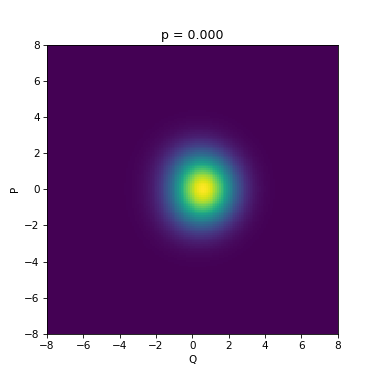

<IPython.core.display.Javascript object>


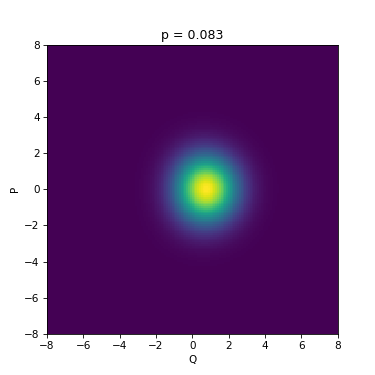

<IPython.core.display.Javascript object>


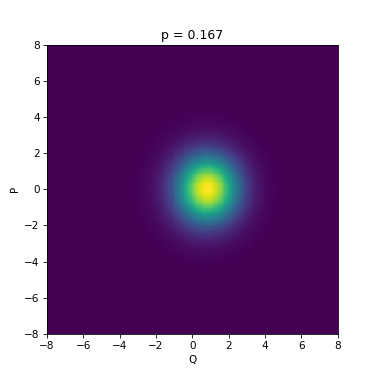

<IPython.core.display.Javascript object>


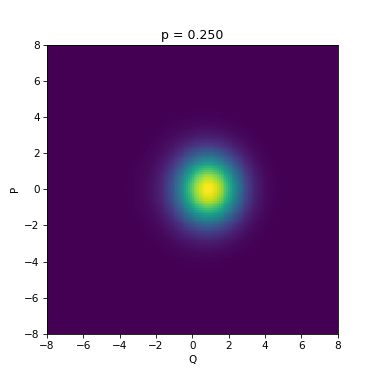

<IPython.core.display.Javascript object>


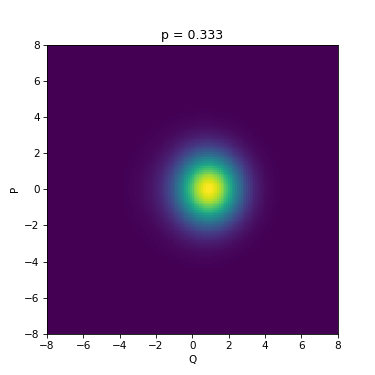

<IPython.core.display.Javascript object>


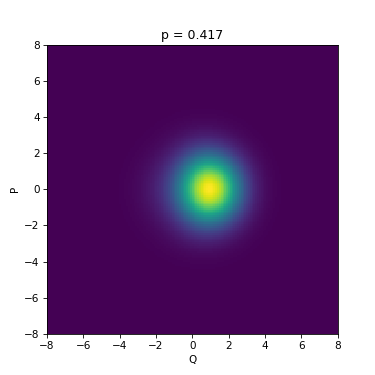

<IPython.core.display.Javascript object>


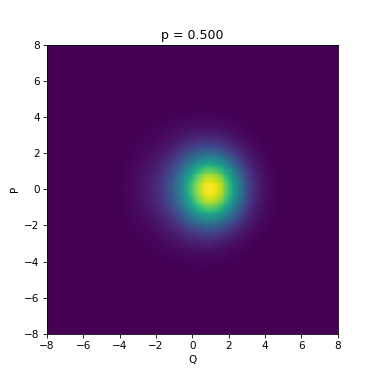

<IPython.core.display.Javascript object>


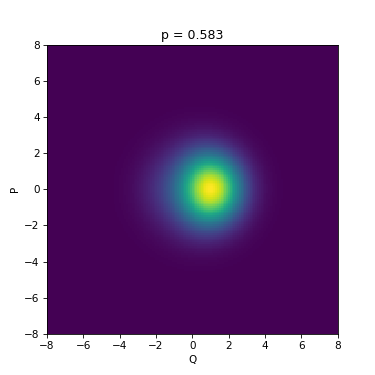

<IPython.core.display.Javascript object>


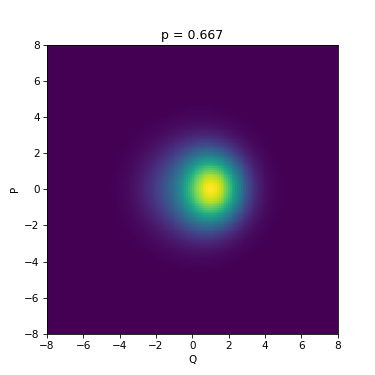

<IPython.core.display.Javascript object>


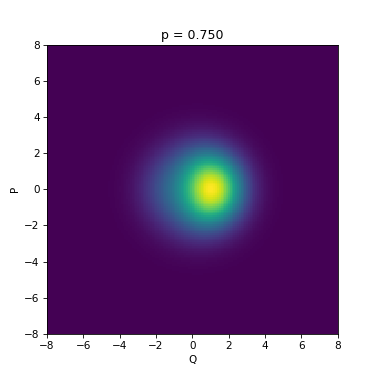

In [39]:
for i, qfunc in enumerate(qfuncs):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pcolormesh(xs, ps, qfunc)
    ax.set_title('p = ' + '%.3f'%etas[i])
    ax.set_xlabel('Q')
    ax.set_ylabel('P')